In [1]:
try:
    import numpy as np
    import geopandas as gpd
    import pandas as pd
    import sklearn
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split

except ModuleNotFoundError:
    print(colored('Module import error'))
else:
    print('All modules properly loaded. Ready to start!!')

All modules properly loaded. Ready to start!!


In [2]:
xyz = pd.read_csv("Pulvini_v2.txt", sep=' ',low_memory=True)

In [3]:
xyz = xyz.replace([np.inf, -np.inf], np.nan)
xyz = xyz.replace([np.nan, -np.nan], 0)

In [4]:
xyz.head(5)

,//X,Y,Z,R,G,B,third_eigenvalue,second_eigenvalue,first_eigenvalue,Verticality,...,Eigenentropy,Omnivariance,Eigenvalues_sum,Surface_density,Normal_change_rate,Mean_curvature,first_ord_mom,Roughness,Intensity,Classification
0,391323.476917,4.987366e+06,304.573395,54,63,40,0.0,0.000004,0.000006,0.049288,...,0.000121,0.000001,0.000010,102514.195313,0.004496,0.00024,2.663013,0.000438,520.0,0.0
1,391323.473919,4.987366e+06,304.573395,54,63,40,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,38442.824219,0.000000,0.00000,1.102174,0.000000,520.0,0.0
2,391323.478920,4.987366e+06,304.573395,57,63,39,0.0,0.000002,0.000003,0.054494,...,0.000065,0.000000,0.000005,76885.648438,0.003546,0.00000,4.552101,0.000098,1040.0,0.0
3,391323.484917,4.987366e+06,304.573395,58,61,38,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,38442.824219,0.000000,0.00000,1.939511,0.000000,1040.0,0.0
4,391323.485920,4.987366e+06,304.573395,59,63,41,0.0,0.000003,0.000006,0.120645,...,0.000102,0.000001,0.000008,64071.375000,0.000000,0.00000,1.620039,0.000401,1040.0,0.0


In [5]:
xyz['NDTI'] = (xyz['R'] - xyz['G'])/(xyz['R'] + xyz['G'])
xyz['RonG'] = xyz['R']/xyz['G']
xyz['RonB'] = xyz['R']/xyz['B']
xyz['GonR'] = xyz['G']/xyz['R']
xyz['GonB'] = xyz['G']/xyz['B']
xyz['BonR'] = xyz['B']/xyz['R']
xyz['BonG'] = xyz['B']/xyz['G']

In [6]:
to_be_predict = xyz.loc[xyz['Classification'] == 0, :]
#to_be_predict=to_be_predict.loc[to_be_predict['Classification'] != 4, :]
tr_test = xyz.loc[xyz['Classification'] != 0, :]
#tr_test=tr_test.loc[tr_test['Classification'] != 4, :]

In [7]:
tr_test.head(5)

,//X,Y,Z,R,G,B,third_eigenvalue,second_eigenvalue,first_eigenvalue,Verticality,...,Roughness,Intensity,Classification,NDTI,RonG,RonB,GonR,GonB,BonR,BonG
90074,391323.532917,4.987368e+06,304.568390,70,73,39,0.0,0.0,0.0,0.0,...,0.0,7801.0,3.0,-0.020979,0.958904,1.794872,1.042857,1.871795,0.557143,0.534247
90075,391323.535919,4.987368e+06,304.568390,72,72,41,0.0,0.0,0.0,0.0,...,0.0,8321.0,3.0,0.000000,1.000000,1.756098,1.000000,1.756098,0.569444,0.569444
90076,391323.531918,4.987368e+06,304.567383,71,69,43,0.0,0.0,0.0,0.0,...,0.0,6761.0,3.0,0.014286,1.028986,1.651163,0.971831,1.604651,0.605634,0.623188
90379,391323.505917,4.987368e+06,304.567383,68,66,35,0.0,0.0,0.0,0.0,...,0.0,13002.0,3.0,0.014925,1.030303,1.942857,0.970588,1.885714,0.514706,0.530303
90380,391323.479919,4.987368e+06,304.570404,65,71,37,0.0,0.0,0.0,0.0,...,0.0,7281.0,3.0,-0.044118,0.915493,1.756757,1.092308,1.918919,0.569231,0.521127


In [8]:
size = tr_test['Classification'].value_counts(sort=1)
print('numero di campioni per classe:',size)


numero di campioni per classe: 3.0    581046
2.0    172503
1.0     46776
4.0      8901
Name: Classification, dtype: int64


In [9]:
x= tr_test.drop(columns=['Classification'], axis='columns').set_index(['//X','Y','Z'])
y= tr_test.drop(tr_test.columns.difference(['Classification']), axis='columns')
x.head(5)

,,,R,G,B,third_eigenvalue,second_eigenvalue,first_eigenvalue,Verticality,Sphericity,Surface_var,PCA2,...,first_ord_mom,Roughness,Intensity,NDTI,RonG,RonB,GonR,GonB,BonR,BonG
//X,Y,Z,,,,,,,,,,,,,,,,,,,,,
391323.532917,4.987368e+06,304.568390,70,73,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7801.0,-0.020979,0.958904,1.794872,1.042857,1.871795,0.557143,0.534247
391323.535919,4.987368e+06,304.568390,72,72,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8321.0,0.000000,1.000000,1.756098,1.000000,1.756098,0.569444,0.569444
391323.531918,4.987368e+06,304.567383,71,69,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6761.0,0.014286,1.028986,1.651163,0.971831,1.604651,0.605634,0.623188
391323.505917,4.987368e+06,304.567383,68,66,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13002.0,0.014925,1.030303,1.942857,0.970588,1.885714,0.514706,0.530303
391323.479919,4.987368e+06,304.570404,65,71,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7281.0,-0.044118,0.915493,1.756757,1.092308,1.918919,0.569231,0.521127


In [10]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(y)

/home/hal9000/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(x),columns = x.columns, index=x.index)


In [12]:
X.head(5)

,,,R,G,B,third_eigenvalue,second_eigenvalue,first_eigenvalue,Verticality,Sphericity,Surface_var,PCA2,...,first_ord_mom,Roughness,Intensity,NDTI,RonG,RonB,GonR,GonB,BonR,BonG
//X,Y,Z,,,,,,,,,,,,,,,,,,,,,
391323.532917,4.987368e+06,304.568390,0.231111,0.255507,0.122172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.241914,0.554323,0.424166,0.347853,0.309942,0.355182,0.232537,0.256160
391323.535919,4.987368e+06,304.568390,0.240000,0.251101,0.131222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.258040,0.593325,0.463535,0.336174,0.276885,0.318759,0.241928,0.288460
391323.531918,4.987368e+06,304.567383,0.235556,0.237885,0.140271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.209663,0.619883,0.491303,0.304567,0.255158,0.271080,0.269554,0.337779
391323.505917,4.987368e+06,304.567383,0.222222,0.224670,0.104072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.403200,0.621073,0.492565,0.392427,0.254199,0.359565,0.200142,0.252542
391323.479919,4.987368e+06,304.570404,0.208889,0.246696,0.113122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.225788,0.511307,0.382580,0.336373,0.348084,0.370018,0.241765,0.244121


#model_comaprison_take lots of time!

In [13]:
#import supervised_model as sm

In [14]:
#test=sm.train_evaluate_multiple_models(X, Y, 0.30, 42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.30)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [17]:
# RANDOM FOREST CLASSIFIER
##model = RandomForestClassifier(n_estimators=200, criterion ='gini', random_state=42)
##model.fit(X_train, y_train)

In [18]:
# save the RF model locally
##joblib.dump(model, 'RF_beams_model.joblib')

# load the model
model = joblib.load('RF_beams_model.joblib')


In [19]:
y_pred=model.predict(X_test)

In [20]:
#accuracy measures
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

print("accuratezza test: %0.3f" % accuracy_score(y_test, y_pred))
print("accuratezza modello: %0.3f" % model.score(X_train, y_train))

prec =precision_recall_fscore_support(y_test, y_pred,average='macro', warn_for=('precision'), zero_division = 0)
print('PRECISION, RECALL, F1-score:',prec)


accuratezza test: 0.996
accuratezza modello: 0.996
PRECISION, RECALL, F1-score: (0.9913764226777715, 0.9864528141825307, 0.9888821360627386, None)


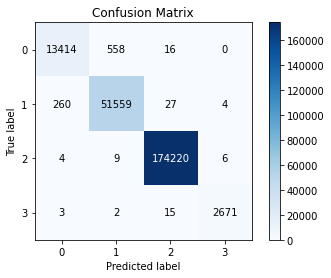

In [21]:
plot_confusion_matrix(y_test, y_pred)
plt.show()

In [22]:
from sklearn.feature_selection import SelectFromModel
# Feature selection
sfm = SelectFromModel(model, threshold=0.75 * np.mean(model.feature_importances_), prefit=True)

Xtrain_1 = sfm.transform(X_train)
Xtest_1 = sfm.transform(X_test)

shape = np.shape(Xtrain_1)
print("Shape of the dataset original ", np.shape(X_train))
print("Shape of the dataset pruned ", shape)

/home/hal9000/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/hal9000/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Shape of the dataset original  (566458, 29)
Shape of the dataset pruned  (566458, 9)


In [23]:
#model.fit(Xtrain_1, y_train)

In [24]:
# save the RF model locally
#joblib.dump(model, 'RF_beams_model_imp.joblib')

# load the model
model = joblib.load('RF_beams_model_imp.joblib')

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

featureImp= []
for feat, importance in zip(X_train[:566458], model.feature_importances_):  
    temp = [feat, importance]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))


             Feature  Importance
3   third_eigenvalue    0.530023
8        Surface_var    0.086368
6        Verticality    0.082652
7         Sphericity    0.065223
4  second_eigenvalue    0.060870
2                  B    0.057747
5   first_eigenvalue    0.052348
1                  G    0.035119
0                  R    0.029648


In [26]:
y_pred_imp=model.predict(Xtest_1)
print("accuratezza test: %0.3f" % accuracy_score(y_test, y_pred_imp))
prec2 =precision_recall_fscore_support(y_test, y_pred_imp,average='macro', warn_for=('precision'), zero_division = 0)
print('PRECISION, RECALL, F1-score:',prec2)

accuratezza test: 0.995
PRECISION, RECALL, F1-score: (0.9859330013992692, 0.9835947814329773, 0.9847527088178863, None)


In [27]:
# Elimina variabili precedenti
del X, Y, xyz, tr_test, size, x, y, lab, y_pred_imp, X_train, X_test, y_train, y_test
# Raccogli la memoria
import gc
gc.collect()


6145

In [28]:
# Replace infinity with NaN and drop rows with NaN values
to_be_predict.replace([np.inf, -np.inf], np.nan, inplace=True)
to_be_predict.dropna(inplace=True)



In [29]:
# Create a copy and drop unnecessary columns
to_be_predict_all = (
    to_be_predict
    .copy()
    .set_index(['//X', 'Y', 'Z'])
    .drop(columns=['Classification'], axis='columns')
)

#for export indexing
index_exp = to_be_predict[['//X', 'Y', 'Z']]


# Free up memory by deleting unnecessary variables
del to_be_predict
import gc
gc.collect()


0

In [30]:
# Transform the data using the feature selection model
to_be_predict_all_reduced = sfm.transform(to_be_predict_all)

# Free up memory used by the original data
del to_be_predict_all
gc.collect()



/home/hal9000/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


48

In [32]:
# Scale the transformed data
to_be_predict_all_reduced = pd.DataFrame(sc.fit_transform(to_be_predict_all_reduced)
                                        )

In [33]:
# Make predictions with the model
predicted_all = model.predict(to_be_predict_all_reduced)

In [34]:
# Creare un DataFrame con le colonne X, Y, Z e i valori predetti
result_df = pd.DataFrame({'X': index_exp['//X'], 'Y': index_exp['Y'], 'Z': index_exp['Z'], 'Predicted_Classification': predicted_all})

# Esporta il DataFrame result_df come CSV
result_df.to_csv(r'results.csv', index=False, sep=' ')


In [35]:
import session_info
session_info.show()